<a href="https://colab.research.google.com/github/uxman-ali/-Brazilian-Sales-Performance-Dashboard-/blob/main/BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [52]:
import requests
try:
    response = requests.get("https://www.airlinequality.com/")
    print(response.status_code)
except requests.exceptions.RequestException as e:
    print(e)

200


In [53]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [55]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,"✅ Trip Verified | The seats were excellent, ..."
1,✅ Trip Verified | After the nightmare of get...
2,✅ Trip Verified | Prior to boarding a gate a...
3,✅ Trip Verified | I flew from Amsterdam to L...
4,"✅ Trip Verified | First the good news, the clu..."
5,✅ Trip Verified | I have never travelled wit...
6,"✅ Trip Verified | Terrible overall, medium ser..."
7,✅ Trip Verified | London Heathrow to Male In...
8,Not Verified | Very good flight following an ...
9,Not Verified | An hour's delay due to late ar...


# **Explanation of the Code:**
Importing re (Regular Expressions module)

Used for pattern-based text cleaning.
Defining the clean_text function:

`re.sub(r'[^a-zA-Z0-9\s]', '', text):`
Removes all special characters and punctuation, keeping only letters, numbers, and spaces.
`re.sub(r'\s+', ' ', text):`
Replaces multiple spaces with a single space to remove unnecessary whitespace.
text.lower():
Converts text to lowercase for consistency.
Applying the function to the DataFrame:

`df['cleaned_reviews'] = df['reviews'].apply(clean_text):`

Applies the clean_text function to each review in the reviews column and stores the cleaned text in a new column cleaned_reviews.
Displaying cleaned data:

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

df['cleaned_reviews'] = df['reviews'].apply(clean_text)
df.head()


,reviews,cleaned_reviews
0,"✅ Trip Verified | The seats were excellent, ...",trip verified the seats were excellent with a...
1,✅ Trip Verified | After the nightmare of get...,trip verified after the nightmare of getting ...
2,✅ Trip Verified | Prior to boarding a gate a...,trip verified prior to boarding a gate agent ...
3,✅ Trip Verified | I flew from Amsterdam to L...,trip verified i flew from amsterdam to las ve...
4,"✅ Trip Verified | First the good news, the clu...",trip verified first the good news the club su...


In [ ]:
df

,reviews,cleaned_reviews
0,"✅ Trip Verified | The seats were excellent, ...",trip verified the seats were excellent with a...
1,✅ Trip Verified | After the nightmare of get...,trip verified after the nightmare of getting ...
2,✅ Trip Verified | Prior to boarding a gate a...,trip verified prior to boarding a gate agent ...
3,✅ Trip Verified | I flew from Amsterdam to L...,trip verified i flew from amsterdam to las ve...
4,"✅ Trip Verified | First the good news, the clu...",trip verified first the good news the club su...
...,...,...
995,✅ Trip Verified | Sydney to London via Singap...,trip verified sydney to london via singapore ...
996,Not Verified | London to Johannesburg. Britis...,not verified london to johannesburg british ai...
997,✅ Trip Verified | I have to say travelling in ...,trip verified i have to say travelling in clu...
998,Not Verified | I had a stress free journey wi...,not verified i had a stress free journey with ...


In [ ]:
cleaned_df = df[['cleaned_reviews']].copy()

In [ ]:
cleaned_df.head(4)

,cleaned_reviews
0,trip verified the seats were excellent with a...
1,trip verified after the nightmare of getting ...
2,trip verified prior to boarding a gate agent ...
3,trip verified i flew from amsterdam to las ve...


This code installs and imports NLTK, downloads the Punkt tokenizer, and tokenizes each cleaned review into words using `word_tokenize()`, storing the result in a new column `tokens`.

In [57]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

cleaned_df['tokens'] = cleaned_df['cleaned_reviews'].apply(word_tokenize)
cleaned_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_reviews,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,sentiment_score,sentiment_category
0,trip verified the seats were excellent with a...,"[trip, verified, the, seats, were, excellent, ...","[trip, verified, seats, excellent, feel, much,...","[trip, verifi, seat, excel, feel, much, room, ...","[trip, verifi, seat, excel, feel, much, room, ...",0.6682,Positive
1,trip verified after the nightmare of getting ...,"[trip, verified, after, the, nightmare, of, ge...","[trip, verified, nightmare, getting, triple, s...","[trip, verifi, nightmar, get, tripl, secur, na...","[trip, verifi, nightmar, get, tripl, secur, na...",0.9428,Positive
2,trip verified prior to boarding a gate agent ...,"[trip, verified, prior, to, boarding, a, gate,...","[trip, verified, prior, boarding, gate, agent,...","[trip, verifi, prior, board, gate, agent, seem...","[trip, verifi, prior, board, gate, agent, seem...",-0.9026,Negative
3,trip verified i flew from amsterdam to las ve...,"[trip, verified, i, flew, from, amsterdam, to,...","[trip, verified, flew, amsterdam, las, vegas, ...","[trip, verifi, flew, amsterdam, la, vega, layo...","[trip, verifi, flew, amsterdam, la, vega, layo...",-0.8601,Negative
4,trip verified first the good news the club su...,"[trip, verified, first, the, good, news, the, ...","[trip, verified, first, good, news, club, suit...","[trip, verifi, first, good, news, club, suit, ...","[trip, verifi, first, good, news, club, suit, ...",0.9199,Positive


This code downloads NLTK stopwords, defines a function `remove_stopwords()` to filter out common English stopwords from tokenized words, and applies it to the `tokens` column, creating a new column `tokens_no_stopwords`.


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

cleaned_df['tokens_no_stopwords'] = cleaned_df['tokens'].apply(remove_stopwords)
cleaned_df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,cleaned_reviews,tokens,tokens_no_stopwords
0,trip verified the seats were excellent with a...,"[trip, verified, the, seats, were, excellent, ...","[trip, verified, seats, excellent, feel, much,..."
1,trip verified after the nightmare of getting ...,"[trip, verified, after, the, nightmare, of, ge...","[trip, verified, nightmare, getting, triple, s..."
2,trip verified prior to boarding a gate agent ...,"[trip, verified, prior, to, boarding, a, gate,...","[trip, verified, prior, boarding, gate, agent,..."
3,trip verified i flew from amsterdam to las ve...,"[trip, verified, i, flew, from, amsterdam, to,...","[trip, verified, flew, amsterdam, las, vegas, ..."
4,trip verified first the good news the club su...,"[trip, verified, first, the, good, news, the, ...","[trip, verified, first, good, news, club, suit..."


This code initializes the **Porter Stemmer** and defines `stem_words()`, which applies stemming to each token in `tokens_no_stopwords`, reducing words to their root form. The transformed tokens are stored in the new column `stemmed_tokens. `

In [ ]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

cleaned_df['stemmed_tokens'] = cleaned_df['tokens_no_stopwords'].apply(stem_words)
cleaned_df.head()


,cleaned_reviews,tokens,tokens_no_stopwords,stemmed_tokens
0,trip verified the seats were excellent with a...,"[trip, verified, the, seats, were, excellent, ...","[trip, verified, seats, excellent, feel, much,...","[trip, verifi, seat, excel, feel, much, room, ..."
1,trip verified after the nightmare of getting ...,"[trip, verified, after, the, nightmare, of, ge...","[trip, verified, nightmare, getting, triple, s...","[trip, verifi, nightmar, get, tripl, secur, na..."
2,trip verified prior to boarding a gate agent ...,"[trip, verified, prior, to, boarding, a, gate,...","[trip, verified, prior, boarding, gate, agent,...","[trip, verifi, prior, board, gate, agent, seem..."
3,trip verified i flew from amsterdam to las ve...,"[trip, verified, i, flew, from, amsterdam, to,...","[trip, verified, flew, amsterdam, las, vegas, ...","[trip, verifi, flew, amsterdam, la, vega, layo..."
4,trip verified first the good news the club su...,"[trip, verified, first, the, good, news, the, ...","[trip, verified, first, good, news, club, suit...","[trip, verifi, first, good, news, club, suit, ..."


In [ ]:
cleaned_df['stemmed_tokens']

,stemmed_tokens
0,"[trip, verifi, seat, excel, feel, much, room, ..."
1,"[trip, verifi, nightmar, get, tripl, secur, na..."
2,"[trip, verifi, prior, board, gate, agent, seem..."
3,"[trip, verifi, flew, amsterdam, la, vega, layo..."
4,"[trip, verifi, first, good, news, club, suit, ..."
...,...
995,"[trip, verifi, sydney, london, via, singapor, ..."
996,"[verifi, london, johannesburg, british, airway..."
997,"[trip, verifi, say, travel, club, europ, wast,..."
998,"[verifi, stress, free, journey, 8, yr, old, au..."


This code initializes the WordNet Lemmatizer and defines `lemmatize_words()`, which applies lemmatization to each token in `stemmed_tokens`, converting words to their base or dictionary form. The results are stored in the `lemmatized_tokens` column.

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

cleaned_df['lemmatized_tokens'] = cleaned_df['stemmed_tokens'].apply(lemmatize_words)
cleaned_df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,cleaned_reviews,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens
0,trip verified the seats were excellent with a...,"[trip, verified, the, seats, were, excellent, ...","[trip, verified, seats, excellent, feel, much,...","[trip, verifi, seat, excel, feel, much, room, ...","[trip, verifi, seat, excel, feel, much, room, ..."
1,trip verified after the nightmare of getting ...,"[trip, verified, after, the, nightmare, of, ge...","[trip, verified, nightmare, getting, triple, s...","[trip, verifi, nightmar, get, tripl, secur, na...","[trip, verifi, nightmar, get, tripl, secur, na..."
2,trip verified prior to boarding a gate agent ...,"[trip, verified, prior, to, boarding, a, gate,...","[trip, verified, prior, boarding, gate, agent,...","[trip, verifi, prior, board, gate, agent, seem...","[trip, verifi, prior, board, gate, agent, seem..."
3,trip verified i flew from amsterdam to las ve...,"[trip, verified, i, flew, from, amsterdam, to,...","[trip, verified, flew, amsterdam, las, vegas, ...","[trip, verifi, flew, amsterdam, la, vega, layo...","[trip, verifi, flew, amsterdam, la, vega, layo..."
4,trip verified first the good news the club su...,"[trip, verified, first, the, good, news, the, ...","[trip, verified, first, good, news, club, suit...","[trip, verifi, first, good, news, club, suit, ...","[trip, verifi, first, good, news, club, suit, ..."


In [ ]:
cleaned_df

,cleaned_reviews,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens
0,trip verified the seats were excellent with a...,"[trip, verified, the, seats, were, excellent, ...","[trip, verified, seats, excellent, feel, much,...","[trip, verifi, seat, excel, feel, much, room, ...","[trip, verifi, seat, excel, feel, much, room, ..."
1,trip verified after the nightmare of getting ...,"[trip, verified, after, the, nightmare, of, ge...","[trip, verified, nightmare, getting, triple, s...","[trip, verifi, nightmar, get, tripl, secur, na...","[trip, verifi, nightmar, get, tripl, secur, na..."
2,trip verified prior to boarding a gate agent ...,"[trip, verified, prior, to, boarding, a, gate,...","[trip, verified, prior, boarding, gate, agent,...","[trip, verifi, prior, board, gate, agent, seem...","[trip, verifi, prior, board, gate, agent, seem..."
3,trip verified i flew from amsterdam to las ve...,"[trip, verified, i, flew, from, amsterdam, to,...","[trip, verified, flew, amsterdam, las, vegas, ...","[trip, verifi, flew, amsterdam, la, vega, layo...","[trip, verifi, flew, amsterdam, la, vega, layo..."
4,trip verified first the good news the club su...,"[trip, verified, first, the, good, news, the, ...","[trip, verified, first, good, news, club, suit...","[trip, verifi, first, good, news, club, suit, ...","[trip, verifi, first, good, news, club, suit, ..."
...,...,...,...,...,...
995,trip verified sydney to london via singapore ...,"[trip, verified, sydney, to, london, via, sing...","[trip, verified, sydney, london, via, singapor...","[trip, verifi, sydney, london, via, singapor, ...","[trip, verifi, sydney, london, via, singapor, ..."
996,not verified london to johannesburg british ai...,"[not, verified, london, to, johannesburg, brit...","[verified, london, johannesburg, british, airw...","[verifi, london, johannesburg, british, airway...","[verifi, london, johannesburg, british, airway..."
997,trip verified i have to say travelling in clu...,"[trip, verified, i, have, to, say, travelling,...","[trip, verified, say, travelling, club, europe...","[trip, verifi, say, travel, club, europ, wast,...","[trip, verifi, say, travel, club, europ, wast,..."
998,not verified i had a stress free journey with ...,"[not, verified, i, had, a, stress, free, journ...","[verified, stress, free, journey, 8, yr, old, ...","[verifi, stress, free, journey, 8, yr, old, au...","[verifi, stress, free, journey, 8, yr, old, au..."


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


This code uses **VADER Sentiment Analysis** to analyze the sentiment of text. It calculates the compound sentiment score for each cleaned review and stores it in the `sentiment_score` column, indicating whether the sentiment is positive, negative, or neutral.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']

cleaned_df['sentiment_score'] = cleaned_df['cleaned_reviews'].apply(get_sentiment_score)

cleaned_df.head()


,cleaned_reviews,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,sentiment_score
0,trip verified the seats were excellent with a...,"[trip, verified, the, seats, were, excellent, ...","[trip, verified, seats, excellent, feel, much,...","[trip, verifi, seat, excel, feel, much, room, ...","[trip, verifi, seat, excel, feel, much, room, ...",0.6682
1,trip verified after the nightmare of getting ...,"[trip, verified, after, the, nightmare, of, ge...","[trip, verified, nightmare, getting, triple, s...","[trip, verifi, nightmar, get, tripl, secur, na...","[trip, verifi, nightmar, get, tripl, secur, na...",0.9428
2,trip verified prior to boarding a gate agent ...,"[trip, verified, prior, to, boarding, a, gate,...","[trip, verified, prior, boarding, gate, agent,...","[trip, verifi, prior, board, gate, agent, seem...","[trip, verifi, prior, board, gate, agent, seem...",-0.9026
3,trip verified i flew from amsterdam to las ve...,"[trip, verified, i, flew, from, amsterdam, to,...","[trip, verified, flew, amsterdam, las, vegas, ...","[trip, verifi, flew, amsterdam, la, vega, layo...","[trip, verifi, flew, amsterdam, la, vega, layo...",-0.8601
4,trip verified first the good news the club su...,"[trip, verified, first, the, good, news, the, ...","[trip, verified, first, good, news, club, suit...","[trip, verifi, first, good, news, club, suit, ...","[trip, verifi, first, good, news, club, suit, ...",0.9199


This code creates a **histogram** to visualize the distribution of sentiment scores in `cleaned_df`. It divides the scores into **20 bins**, adding black edges for clarity. The x-axis represents **sentiment scores**, while the y-axis shows their **frequency**.

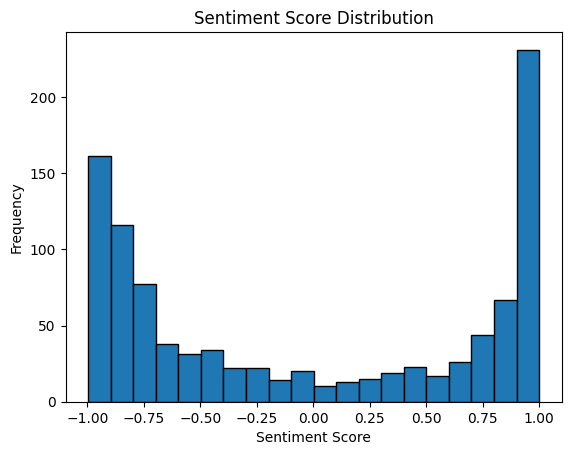

In [ ]:
import matplotlib.pyplot as plt

plt.hist(cleaned_df['sentiment_score'], bins=20, edgecolor='black')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Score Distribution")
plt.show()


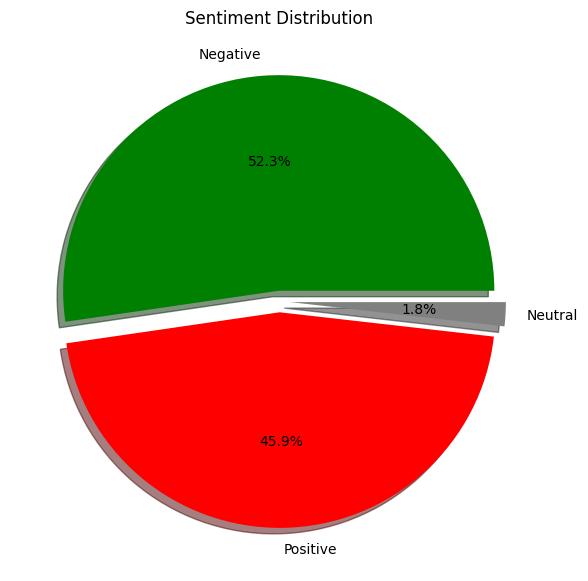

In [58]:
import matplotlib.pyplot as plt

def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

cleaned_df['sentiment_category'] = cleaned_df['sentiment_score'].apply(categorize_sentiment)

sentiment_counts = cleaned_df['sentiment_category'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['green', 'red', 'gray'], explode=(0.05, 0.05, 0.05), shadow=True)

plt.title("Sentiment Distribution")
plt.show()


**Explanation:**

**Categorizes sentiment scores** into Positive, Negative, and Neutral.

**Counts** how many reviews fall into each category.

**Creates a pie chart** with labels and percentages.

**Uses colors:** 🟢 Positive `(Green)`, 🔴 Negative `(Red)`, ⚪ Neutral `(Gray)`.

**Adds explode & shadow** for better visualization.

In [ ]:
df.to_csv("BA_Reviews.csv")

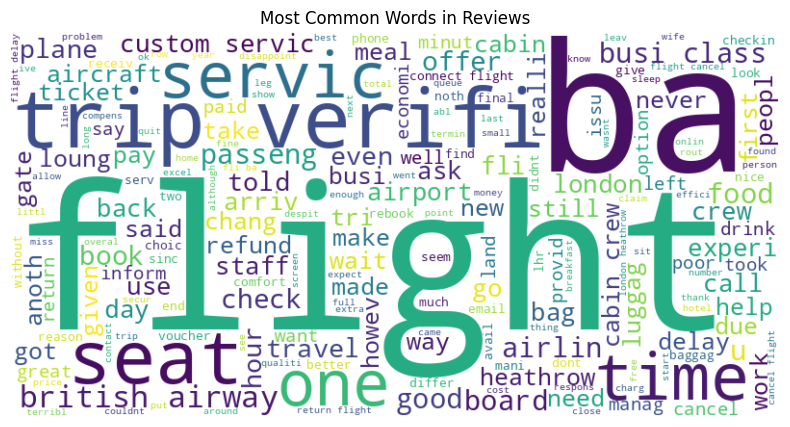

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([' '.join(words) for words in cleaned_df['lemmatized_tokens']])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


**Explanation:**

Joins all lemmatized tokens into a single string.

Uses `WordCloud()` to generate the word cloud.

Uses `colormap='viridis'` for better visualization.

`plt.imshow()` displays the word cloud